<h1 style='color:#5E7AFF'>Eulerian numbers</h1> 
<h3 style='color:#5E7AFF'>A companion to 
<a href="https://oeis.org/A342321">A342321</a> and
<a href="https://oeis.org/A356601">A356601</a>.</h3>
<h4 style='color:#708090'>Peter Luschny, Aug 2022</h4>
<p>You can download this SageMath notebook from <a href='https://github.com/PeterLuschny/EulerianSecondOrderNumbers'>GitHub</a>.</p>


<p style="color:brown;font-size:large">Indexing the first-order Eulerian numbers comes in three flavors: A008292 (following Riordan and Comtet), A173018 (following Graham, Knuth, and Patashnik) and A123125. We use the definition A173018.</p>

<h2 style='color:#5E7AFF;margin-bottom:16px'>Formula <span style='color:orange'>1</span></h2> 
$$\left\langle n\atop  k\right\rangle = 0^k \ \ (n = k),\ 
\left\langle n\atop  k\right\rangle  = 0 \ \ (k \lt 0\ | \ k \gt n), \\ 
(k+1)\left\langle n-1\atop  k\right\rangle  + 
(n-k)\, \left\langle n-1\atop  k-1\right\rangle $$
<p> </p>
<p style= "text-align:center;">The (first-order) Eulerian numbers <a href="https://oeis.org/A173018">A173018</a>.</p>

In [1]:
@cached_function
def E(n, k):
    if n == k: return 0^k
    if k < 0 or k > n : return 0
    return (k + 1) * E(n - 1, k) + (n - k) * E(n - 1, k - 1)


for n in range(10):
    print([E(n, k) for k in (0..n)])

[1]
[1, 0]
[1, 1, 0]
[1, 4, 1, 0]
[1, 11, 11, 1, 0]
[1, 26, 66, 26, 1, 0]
[1, 57, 302, 302, 57, 1, 0]
[1, 120, 1191, 2416, 1191, 120, 1, 0]
[1, 247, 4293, 15619, 15619, 4293, 247, 1, 0]
[1, 502, 14608, 88234, 156190, 88234, 14608, 502, 1, 0]


<h2 style='color:#5E7AFF;margin-bottom:16px'>Formula <span style='color:orange'>2</span></h2>

<p style="color:brown;font-size:large">The Bernoulli numbers $\operatorname{B}_{n}$ as used here have $\operatorname{B}_{1} = 1/2$. Note that Donald Knuth switched to this definition in TAOCP, vol. 1 since 47-th printing, Oct. 2021, and in Concrete Mathematics, since 34-th printing, Jan. 2022.</p>

$$\operatorname{B}_{n} = \frac{1}{n+1}\, \sum_{k=0}^{n}  
(-1)^{k}\frac{ \left\langle n\atop k \right\rangle}{\binom{n}{k}} \quad(n \ge 0).$$

In [2]:
def b(n):
    return sum((-1)^k * E(n, k) / binomial(n, k) 
           for k in (0..n)) // (n + 1)


print([bernoulli_polynomial(1, n) for n in (0..12)])
print([b(n) for n in (0..12)])

[1, 1/2, 1/6, 0, -1/30, 0, 1/42, 0, -1/30, 0, 5/66, 0, -691/2730]
[1, 1/2, 1/6, 0, -1/30, 0, 1/42, 0, -1/30, 0, 5/66, 0, -691/2730]


<h2 style='color:#5E7AFF;margin-bottom:16px'>Formula <span style='color:orange'>3</span></h2>

<p style="color:brown;font-size:large">The Bernoulli polynomials of Eulerian type. See OEIS
<a href="https://oeis.org/A342321">A342321</a>,
   <a href="https://oeis.org/A343277">A343277</a>, and 
   <a href="https://oeis.org/A356601">A356601</a>.</p>

$$\operatorname{\beta}_{n}(x) = \frac{1}{n+1}\, \sum_{k=0}^{n}  
(-1)^{k}\frac{ \left\langle n\atop k \right\rangle}{\binom{n}{k}}\, x^{n-k} \quad(n \ge 0).$$

<html>
  <style>
    table.cineTable {
      border: 6px solid silver;
      background-color: #fcfbf1;
      width: 100%;
      text-align: center;
      color: royalblue;
    }

    table.cineTable td,
    table.cineTable th {
      border: 1px solid silver;
      padding: 4px 4px;
    }

    table.cineTable tbody td {
      font-size: 15px;
    }

    table.cineTable thead {
      background: silver;
    }

    table.cineTable thead th {
      font-size: 17px;
      font-weight: 500;
      color: blue;
      text-align: center;
      border-left: 2px solid silver;
    }

    table.cineTable thead th:first-child {
      border-left: none;
    }

    table.cineTable tfoot {
      font-size: 16px;
      font-weight: bold;
      color: #F0F0F0;
      background: #948473;
    }

    table.cineTable tfoot td {
      font-size: 16px;
    }
  </style>

  <table class="cineTable">
    <thead>
      <tr>
        <th>x<sup>0</sup></th>
        <th>x<sup>1</sup></th>
        <th>x<sup>2</sup></th>
        <th>x<sup>3</sup></th>
        <th>x<sup>4</sup></th>
        <th>x<sup>5</sup></th>
        <th>&#x2211;</th>
      </tr>
    </thead>
    <tbody>
      <tr>
        <td>+ 1</td>
        <td>&#183;</td>
        <td>&#183;</td>
        <td>&#183;</td>
        <td>&#183;</td>
        <td>&#183;</td>
        <td>1</td>
      </tr>
      <tr>
        <td>0</td>
        <td>+ 1 / 2</td>
        <td>&#183;</td>
        <td>&#183;</td>
        <td>&#183;</td>
        <td>&#183;</td>
        <td>1 / 2</td>
      </tr>
      <tr>
        <td>0</td>
        <td>- 1/ 6</td>
        <td>+ 1 / 3</td>
        <td>&#183;</td>
        <td>&#183;</td>
        <td>&#183;</td>
        <td>1 / 6</td>
      </tr>
      <tr>
        <td>0</td>
        <td>+ 1 / 12</td>
        <td>- 1 / 3</td>
        <td>+ 1 / 4</td>
        <td>&#183;</td>
        <td>&#183;</td>
        <td>0</td>
      </tr>
      <tr>
        <td>0</td>
        <td>- 1 / 20</td>
        <td>+ 11 / 30</td>
        <td>- 11 / 20</td>
        <td>+ 1 / 5</td>
        <td>&#183;</td>
        <td>-1 / 30</td>
      </tr>
      <tr>
        <td>0</td>
        <td>+ 1 / 30</td>
        <td>- 13 / 30</td>
        <td>+ 11 / 10</td>
        <td>- 13 / 15</td>
        <td>+ 1 / 6</td>
        <td>0</td>
      </tr>
    </tbody>
  </table>

In [3]:
def eulber(n, x):
    return sum((-1)^k * x^(n - k) * E(n, k) / binomial(n, k) 
           for k in (0..n)) / (n + 1)

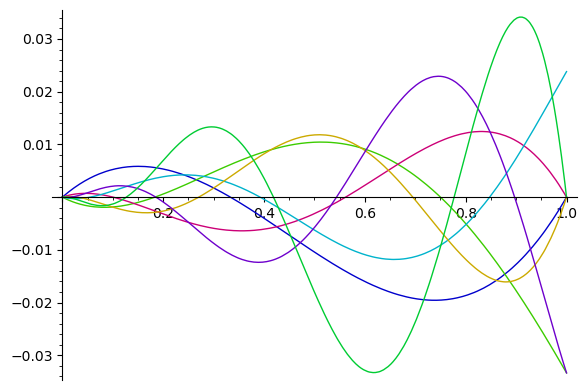

In [4]:
plot([eulber(n, x) for n in range(3, 10)], (x, 0, 1))

In [5]:
from sage.symbolic.integration.integral import definite_integral

def eb(n, x):
    w = sum(E(n, k)*x^(k + 1)*(x - 1)^(n - k - 1) for k in (0..n))
    return definite_integral(w, x, 0, 1)


print([1] + [eb(n, x) for n in range(1, 13)])

[1, 1/2, 1/6, 0, -1/30, 0, 1/42, 0, -1/30, 0, 5/66, 0, -691/2730]


<h2 style='color:#5E7AFF;margin-bottom:16px'>Formula <span style='color:orange'>4</span></h2>

<p style="color:brown;font-size:large">See <a href="https://oeis.org/A356546">A356546</a>. The numbers generate a triangle which is the counterpart of Leibniz's harmonic triangle <a href="https://oeis.org/A003506">A003506</a>, which is generated when the falling factorial is used instead.</p>

 $$ F(n,k) \, = \, \frac{ (n+1)^{ \overline{n} } }{ k! \, (n-k)! },$$

In [6]:
def F(n, k):
    return rising_factorial(n+1, n) // (factorial(k) * factorial(n-k))


for n in range(9): 
    print([F(n, k) for k in range(n+1)])

[1]
[2, 2]
[6, 12, 6]
[20, 60, 60, 20]
[70, 280, 420, 280, 70]
[252, 1260, 2520, 2520, 1260, 252]
[924, 5544, 13860, 18480, 13860, 5544, 924]
[3432, 24024, 72072, 120120, 120120, 72072, 24024, 3432]
[12870, 102960, 360360, 720720, 900900, 720720, 360360, 102960, 12870]


<h2 style='color:#5E7AFF;margin-bottom:16px'>Formula <span style='color:orange'>5</span></h2>

$$ \frac{\operatorname{B}_n}{\operatorname{C}_n} \, = \, \sum_{k=0}^{n} (-1)^{k} \frac{E(n, k)}{F(n,k)},$$ 
<p style="color:brown;font-size:large">where $\operatorname{C}_n$ denote the Catalan numbers.</p>

In [7]:
def catalan(n):
    return binomial(2*n, n)/(n + 1)


def lhs(n):
    return bernoulli_polynomial(1, n) / catalan(n)

def rhs(n):
    return sum((-1)^k * E(n, k) / F(n, k) for k in (0..n))


print([lhs(n) for n in (0..12)])
print([rhs(n) for n in (0..12)])

[1, 1/2, 1/12, 0, -1/420, 0, 1/5544, 0, -1/42900, 0, 5/1108536, 0, -691/567872760]
[1, 1/2, 1/12, 0, -1/420, 0, 1/5544, 0, -1/42900, 0, 5/1108536, 0, -691/567872760]


<p style="color:brown;font-size:large">P.S.: If you like Eulerian numbers you might also want to have a look at this little compendium: <a href='https://github.com/PeterLuschny/EulerianSecondOrderNumbers/blob/main/Eulerian2_A340556.ipynb'>EulerianSecondOrderNumbers</a>.</p>

<p style="color:brown;font-size:large">~~~</p>